In [1]:
import pandas as pd 
import numpy as np
import nltk
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#!pip install nltk 

In [3]:
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df=pd.read_csv('restaurant.csv')
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [5]:
df.tail()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51
10416,3220316,mMa_YQNBJfuh_Nw_x81jlw,GsALS1y9wJoBRJTEzJiISg,RESDUcs7fIiihp38-d6_6g,4,1,1,1,I got a chance to go to the Bacchanal Buffett ...,2019-11-30 22:36:56


In [6]:
df.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,stars,useful,funny,cool
count,1.041700e+04,10417.000000,10417.000000,10417.000000,10417.000000
mean,2.775377e+06,3.777671,1.419603,0.640875,0.759720
std,2.428654e+05,1.331451,4.875888,3.347964,4.125847
min,2.370338e+06,1.000000,0.000000,0.000000,0.000000
25%,2.566392e+06,3.000000,0.000000,0.000000,0.000000
50%,2.762536e+06,4.000000,0.000000,0.000000,0.000000
75%,2.975480e+06,5.000000,1.000000,0.000000,0.000000
max,3.220316e+06,5.000000,176.000000,159.000000,172.000000


In [8]:
df.user_id.nunique() #customer

10129

In [9]:
df['year'] = df.date.map(lambda x: pd.to_datetime(x).year )
df.year

0        2012
1        2014
2        2015
3        2016
4        2015
         ... 
10412    2019
10413    2019
10414    2019
10415    2019
10416    2019
Name: year, Length: 10417, dtype: int64

In [10]:
df['month'] = df.date.map(lambda x: pd.to_datetime(x).month )
df.month

0        12
1         1
2         6
3        12
4         7
         ..
10412    11
10413    11
10414    12
10415    11
10416    11
Name: month, Length: 10417, dtype: int64

In [11]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012,12
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014,1
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015,6
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016,12
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015,7


In [12]:
df.groupby('year').sum()

,Unnamed: 0,stars,useful,funny,cool,month
year,,,,,,
2012,1161892229,1665,1311,524,589,4521
2013,3248504125,4717,2370,1140,1243,7970
2014,3558374319,5025,2295,1245,1328,8752
2015,3791422054,5492,2171,1044,1213,9338
2016,3700470995,4958,1748,887,992,8548
2017,4297697777,5853,1632,645,895,10747
2018,3919842740,5226,1384,443,599,8890
2019,5232893115,6416,1877,748,1055,12090


In [13]:
year2019 = df[df['year']==2019]
year2019.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month
5812,2807586,hOgwpo28J0N2f-tkkc_i4w,VQ38As5za4ZJc6dUIlwYjg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,We went for brunch on a Sunday. This was a hug...,2019-02-18 00:27:00,2019,2
6160,2835325,LWP4ui4vOjvsFAmkR6MDFQ,JcruzC0khdWpKBCW9_o_-A,RESDUcs7fIiihp38-d6_6g,3,0,0,0,Definitely a great Buffett in Vegas but I foun...,2019-02-19 02:25:44,2019,2
6174,2836403,623jDZoy0qyLB2aQ3jy8WQ,gceQ1txPGJyWoGlYEkbSdw,RESDUcs7fIiihp38-d6_6g,4,0,0,0,The buffet presentation is not as elaborate as...,2019-01-13 03:47:45,2019,1
6426,2858486,SquQlSr81MFMnNYDyZoZ9g,xrJRuFRZspPUXN_16kxafw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,Best buffet. Lots of good and all great qualit...,2019-01-09 04:35:38,2019,1
6427,2858570,Rl6HTTTLlggYb6UVHDcyYg,Pazm-C7p6xmdr3sxsK4Qzg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,My husband and i enjoyed a nice week long vaca...,2019-01-16 13:28:06,2019,1


In [14]:
year2019.groupby('month').sum()

,Unnamed: 0,stars,useful,funny,cool,year
month,,,,,,
1,342650486,402,398,161,273,226128
2,335501791,417,158,70,114,220071
3,364680967,371,164,49,62,238242
4,335944234,407,136,59,86,220071
5,316437553,378,74,19,29,205938
6,304311904,364,109,49,38,197862
7,399272023,485,360,161,230,260451
8,421645269,527,99,38,39,274584
9,727405895,948,101,34,33,472446


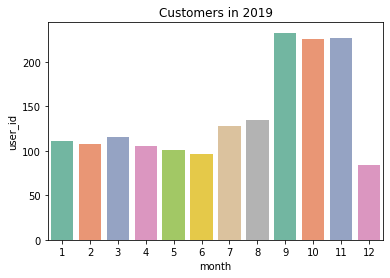

In [15]:
user2019=pd.DataFrame(year2019.groupby('month').user_id.nunique())

sns.barplot(x=user2019.index, y=user2019.user_id, palette='Set2')
plt.title("Customers in 2019");

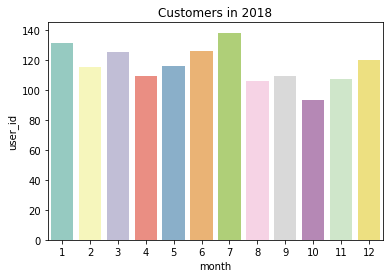

In [18]:
year2018=df[df['year']==2018]
user2018=pd.DataFrame(year2018.groupby('month').user_id.nunique())
sns.barplot(x=user2018.index, y=user2018.user_id, palette='Set3')
plt.title("Customers in 2018");

In [19]:
custYears=pd.DataFrame(df.groupby('year').user_id.nunique())
custYears

,user_id
year,
2012,414
2013,1184
2014,1306
2015,1410
2016,1368
2017,1573
2018,1379
2019,1661


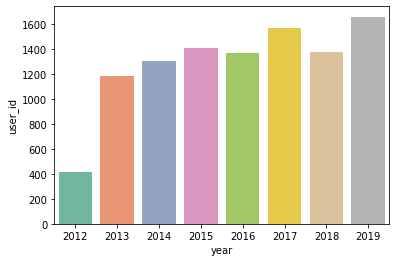

In [20]:
sns.barplot(x=custYears.index, y=custYears.user_id, palette='Set2');

In [21]:
custLike=pd.DataFrame(df.groupby('year').stars.mean())
custLike

,stars
year,
2012,3.899297
2013,3.930833
2014,3.809704
2015,3.870331
2016,3.613703
2017,3.685768
2018,3.714286
2019,3.807715


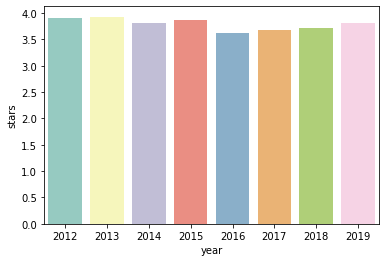

In [22]:
sns.barplot(x=custLike.index, y=custLike.stars, palette='Set3');

In [23]:
df['text']=df['text'].str.lower()
df['text']=df['text'].replace('[^\w\s]','')
df['text']=df['text'].str.replace('\d+','')
df['text']=df['text'].str.replace('["\!]','')
df['text']=df['text'].str.replace('\n',' ').replace('\r','')

In [24]:
dfx=df[['user_id','stars','text','year']]

In [25]:
dfx.text

0        after getting food poisoning at the palms hote...
1        a feast worthy of gods  baccarnal buffet in ca...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could. m...
                               ...                        
10412    best buffet ever irma was great, served us bet...
10413    hollllllyyyy moleyyyy   this buffet was one fo...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets i've had in vegas. my ...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10417, dtype: object

In [26]:
from textblob import TextBlob, Word

In [27]:
good   = 0
bad    = 0
normal = 0

for i in df['stars']:
    if i>3:
        df['sentiment']='good'
        good+=1
    elif i<3:
        df['sentiment']='bad'
        bad+=1
    else:
        df['sentiment']='normal'
        normal+=1
        
print("Good score is " + str(good) + ' stars')
print("Normal score is " + str(normal) + ' stars')
print("Bad score is " + str(bad) + ' stars')

Good score is 6883 stars
Normal score is 1561 stars
Bad score is 1973 stars


In [28]:
df.sample(5)

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,month,sentiment
8130,3008483,y6QjUWn2_m2SB1fT7W4-ug,dPKh6SqDQU4xcqnKD6wFrw,RESDUcs7fIiihp38-d6_6g,5,0,0,0,literally the best buffet that i have ever had...,2017-02-09 02:27:01,2017,2,good
1623,2493919,Zc39MsTM9OqbzAjFrPPHhA,GiPFuaACs7CuVf5B8NspfA,RESDUcs7fIiihp38-d6_6g,3,0,0,0,this place is very disappointing. wait time fo...,2017-06-30 01:24:08,2017,6,good
5726,2801664,SwG-rtkvEOIwDBMaBvppWg,uiLP68v96ptbOcMeMwOn4Q,RESDUcs7fIiihp38-d6_6g,3,0,0,0,not sure what the hype is over this place we ...,2014-12-31 22:50:58,2014,12,good
4179,2685031,NgMaDXWgIY9vVdzFfPWjDg,9RRbE-vBxAEVUEUk7rYBvg,RESDUcs7fIiihp38-d6_6g,1,2,0,0,this review is only for the christmas feast. t...,2018-01-05 06:18:55,2018,1,good
1439,2478783,EQKWjer2X2RNYlWULUb6tQ,f9c42sHa5gRuxRDNRFMdAQ,RESDUcs7fIiihp38-d6_6g,5,2,0,1,best buffet by far. priced a little on the hig...,2015-07-30 08:30:59,2015,7,good


In [29]:
df[['polarity','subjectivity']]=df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [30]:
from PIL import Image
from wordcloud import WordCloud 

In [31]:
def wordcloud(text):
    mask=np.array(Image.open("cloud.png"))
    wordcloud=WordCloud(max_font_size=50, max_words=1000, background_color="white",mask=mask)
    wordcloud.generate(str(text))
    wordcloud.to_file("wordcloud.png")
    path="wordcloud.png"
    display(Image.open(path))

In [32]:
gword=df[df["stars"]==5] # gword = good words
nword=df[df["stars"]==3] # nword = normal words
bword=df[df["stars"]==1] # gword = bad words

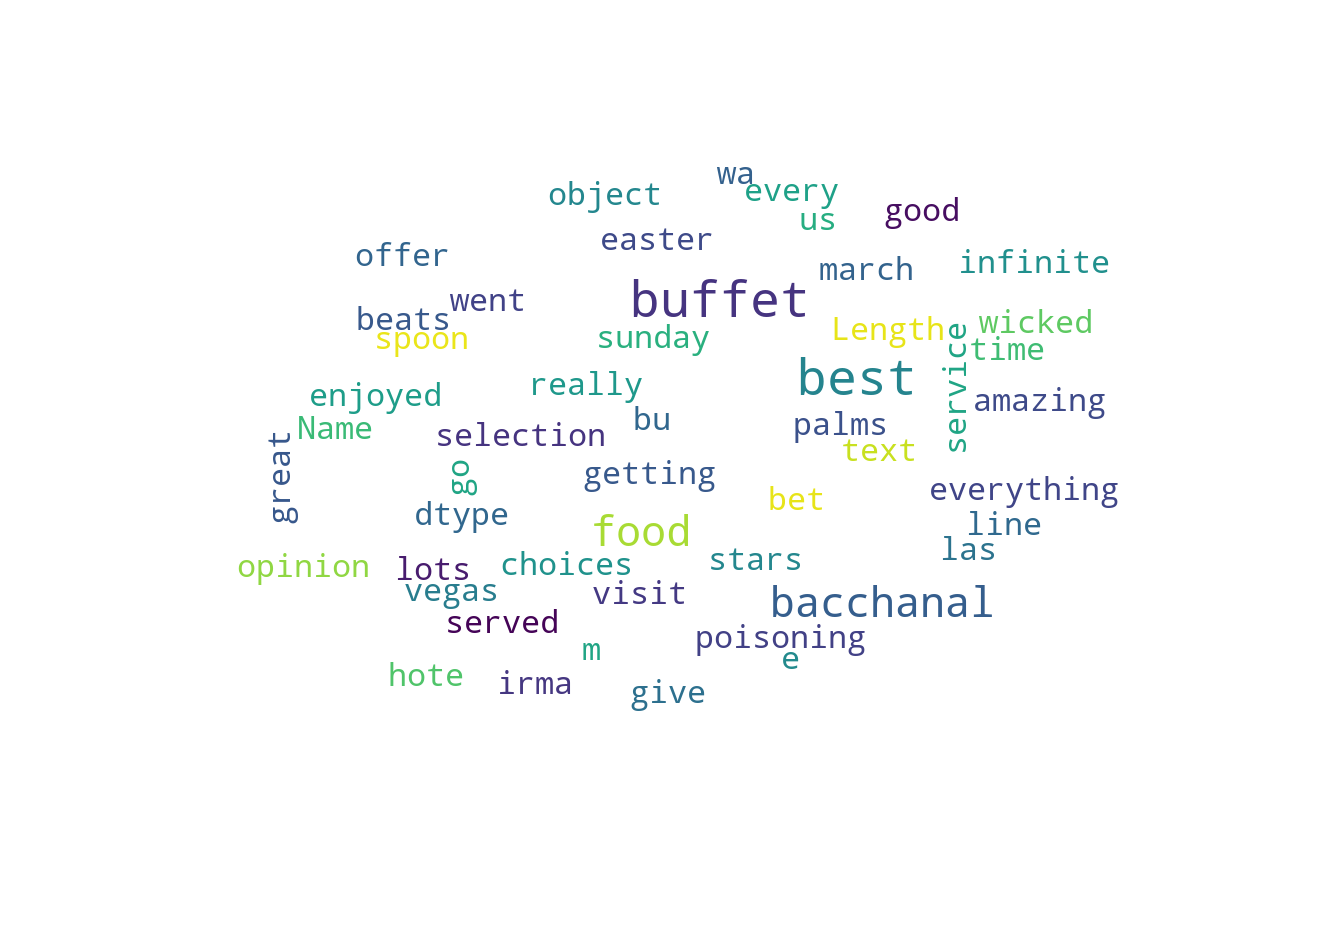

In [33]:
wordcloud(gword.text)

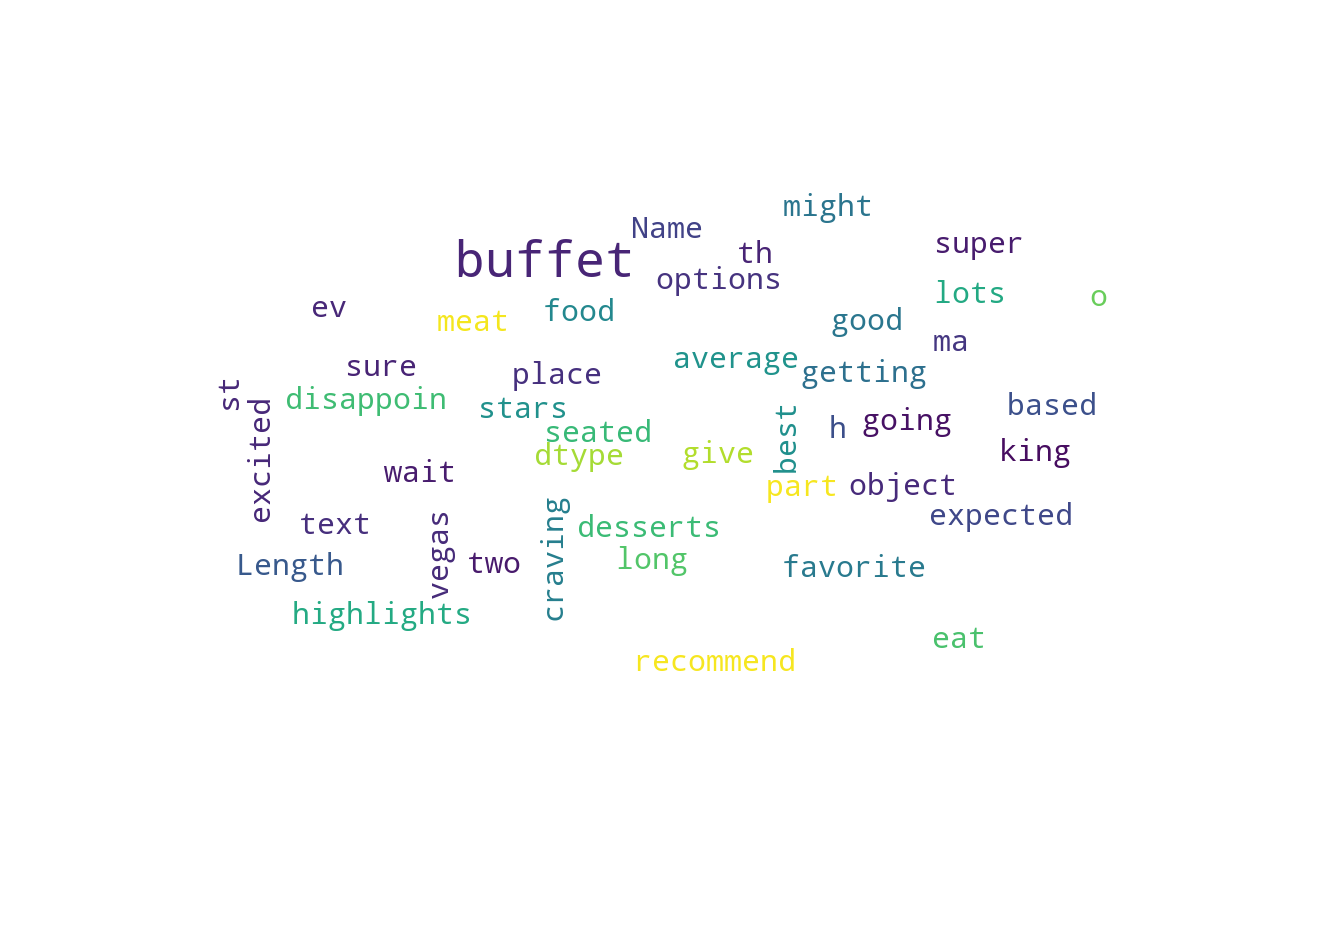

In [34]:
wordcloud(nword.text)

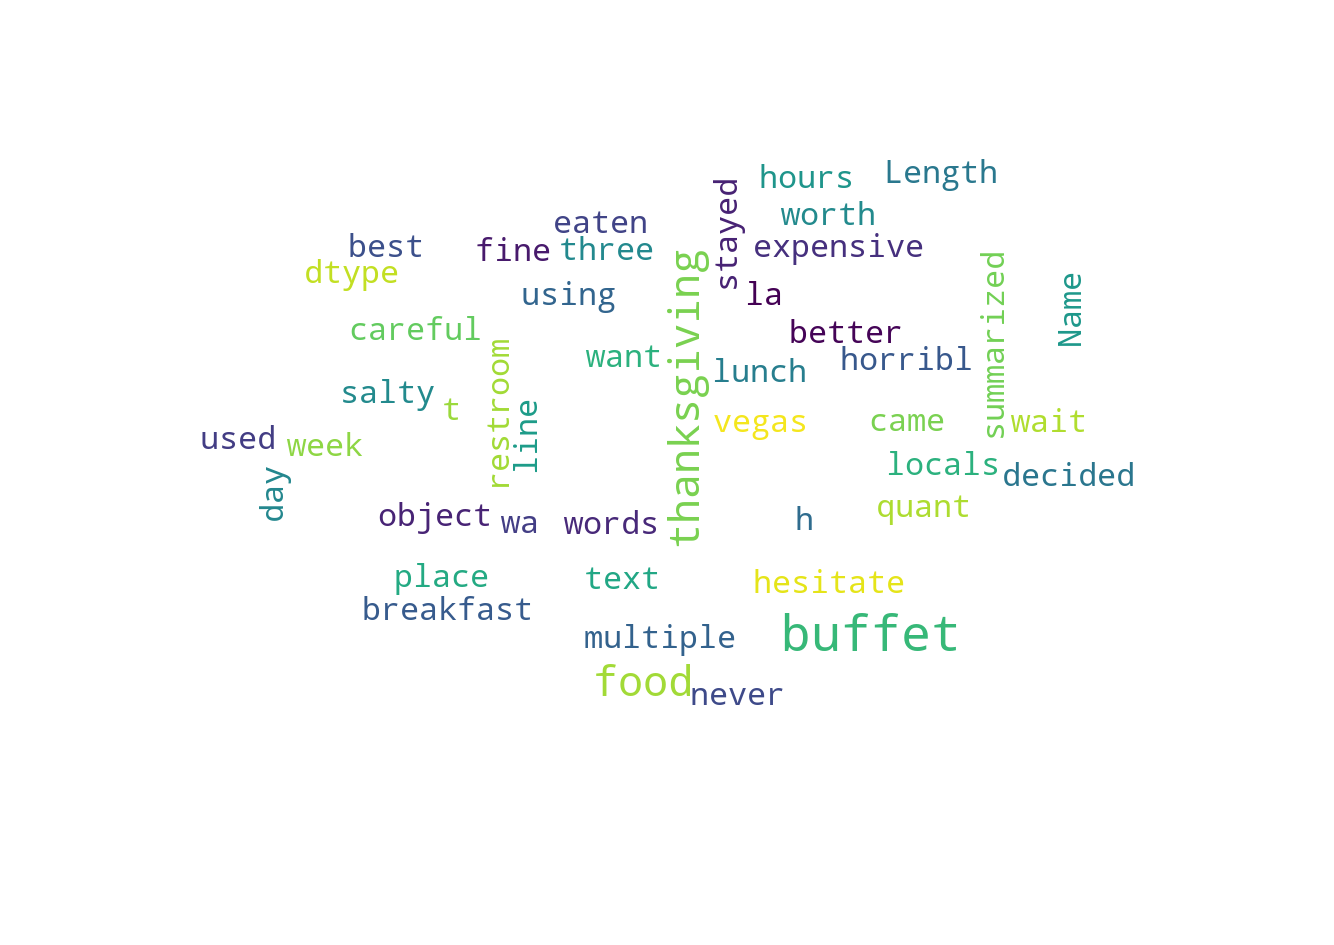

In [35]:
wordcloud(bword.text)